<a href="https://colab.research.google.com/github/Akashkunwar/Dscourses/blob/main/Guvi/Assignment/Task%206/Bosten_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Akashkunwar/Dscourses/main/Guvi/Assignment/Task%206/data/Boston%20Housing%20train.csv")
find_df = pd.read_csv("https://raw.githubusercontent.com/Akashkunwar/Dscourses/main/Guvi/Assignment/Task%206/data/Boston%20Housing%20test.csv")

In [3]:
df.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [4]:
find_df.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14


In [5]:
df.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.describe()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,3.757191,10.970000,10.936425,0.072500,0.552817,6.292165,68.086000,3.819462,9.462500,403.797500,18.459000,359.455375,12.668525,22.475750
std,115.614301,9.155496,22.796261,6.848042,0.259639,0.115488,0.709923,28.386888,2.132445,8.687478,169.656816,2.148105,86.732906,7.207047,9.218611
min,0.000000,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000
25%,99.750000,0.077820,0.000000,5.130000,0.000000,0.449000,5.877500,42.375000,2.109150,4.000000,277.000000,17.400000,376.115000,6.990000,17.100000
50%,199.500000,0.242170,0.000000,8.560000,0.000000,0.532000,6.208500,76.950000,3.272100,5.000000,329.000000,18.950000,391.575000,10.875000,21.000000
75%,299.250000,3.543427,12.500000,18.100000,0.000000,0.624000,6.620500,93.825000,5.214600,24.000000,666.000000,20.200000,396.285000,16.910000,25.000000
max,399.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# 1.CRIM - per capita crime rate by town
# 2.ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# 3.INDUS - proportion of non-retail business acres per town.
# 4.CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# 5.NOX - nitric oxides concentration (parts per 10 million)
# 6.RM - average number of rooms per dwelling
# 7.AGE - proportion of owner-occupied units built prior to 1940
# 8.DIS - weighted distances to five Boston employment centres
# 9.RAD - index of accessibility to radial highways
# 10.TAX - full-value property-tax rate per $10,000
# 11.PTRATIO - pupil-teacher ratio by town
# 12.B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# 13.LSTAT - % lower status of the population
# 14.MEDV - Median value of owner-occupied homes in $1000's

In [8]:
df.corr().style.background_gradient(cmap='coolwarm')

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
ID,1.000000,-0.009895,-0.037340,0.005167,-0.034274,-0.034631,0.061728,-0.031016,0.010385,-0.031669,-0.007460,0.056734,-0.030764,-0.019382,0.006956
CRIM,-0.009895,1.000000,-0.193548,0.409972,-0.060591,0.422635,-0.205928,0.353379,-0.376323,0.618538,0.577501,0.284967,-0.357581,0.442743,-0.393693
ZN,-0.037340,-0.193548,1.000000,-0.522218,-0.037318,-0.497638,0.290127,-0.554214,0.659949,-0.301067,-0.300221,-0.369974,0.161515,-0.402116,0.336805
INDUS,0.005167,0.409972,-0.522218,1.000000,0.075305,0.759132,-0.396865,0.631742,-0.695199,0.608088,0.731619,0.370383,-0.338007,0.624374,-0.502898
CHAS,-0.034274,-0.060591,-0.037318,0.075305,1.000000,0.084020,0.091267,0.083314,-0.102016,-0.023792,-0.045183,-0.137556,0.040732,-0.055326,0.182096
NOX,-0.034631,0.422635,-0.497638,0.759132,0.084020,1.000000,-0.283907,0.736349,-0.768775,0.602960,0.657875,0.154693,-0.382202,0.622209,-0.434271
RM,0.061728,-0.205928,0.290127,-0.396865,0.091267,-0.283907,1.000000,-0.198918,0.171596,-0.190030,-0.277064,-0.336408,0.120518,-0.634758,0.721489
AGE,-0.031016,0.353379,-0.554214,0.631742,0.083314,0.736349,-0.198918,1.000000,-0.750408,0.457339,0.499478,0.234894,-0.274650,0.593788,-0.354106
DIS,0.010385,-0.376323,0.659949,-0.695199,-0.102016,-0.768775,0.171596,-0.750408,1.000000,-0.492090,-0.520442,-0.185938,0.274036,-0.503383,0.235087
RAD,-0.031669,0.618538,-0.301067,0.608088,-0.023792,0.602960,-0.190030,0.457339,-0.492090,1.000000,0.911103,0.458930,-0.395845,0.503532,-0.386922


In [9]:
fig = px.imshow(df.corr(), color_continuous_scale='Picnic', text_auto=True, aspect="auto")
fig.show()

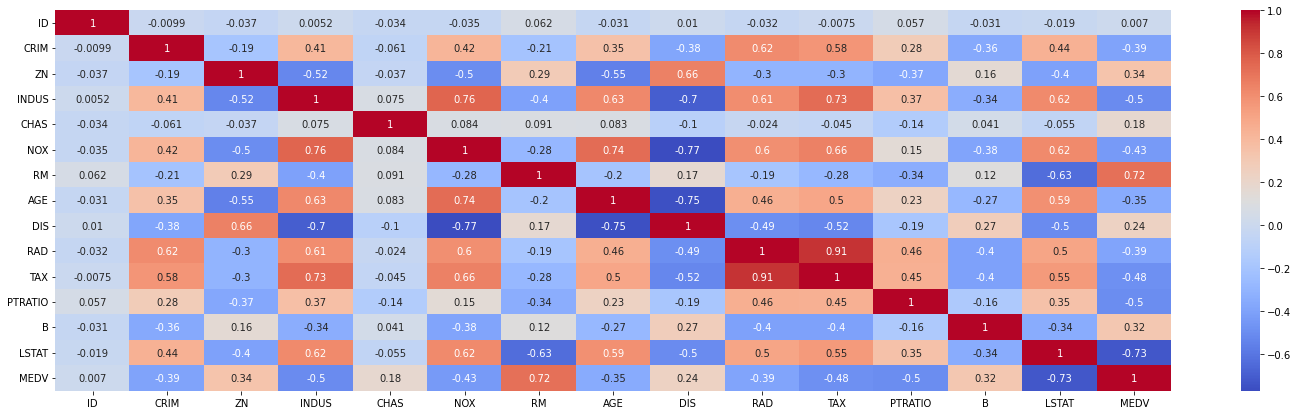

In [10]:
fig, ax = plt.subplots(figsize = (25,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

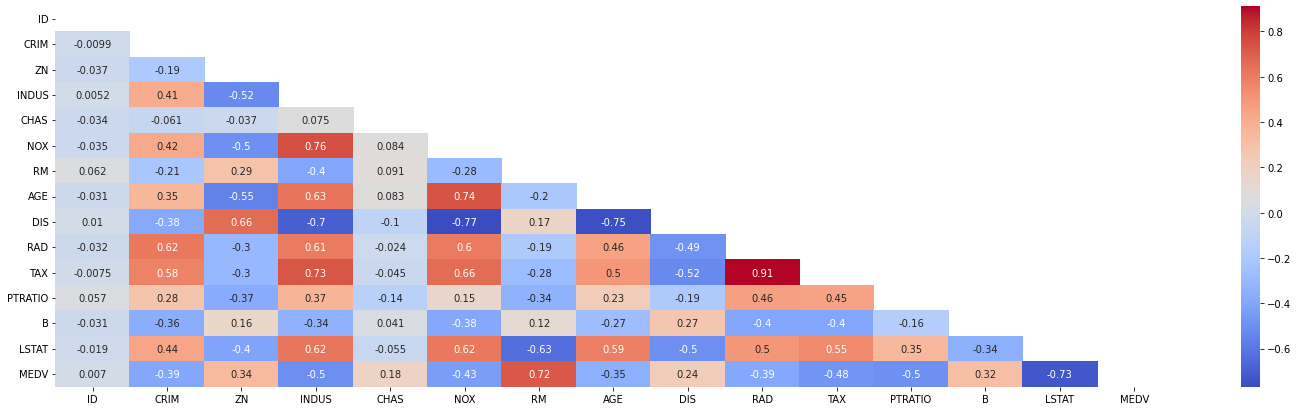

In [11]:
fig, ax = plt.subplots(figsize = (25,7))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, mask=mask, cmap='coolwarm');

In [24]:
from sklearn.model_selection import train_test_split

In [37]:
feature = ["ID","CRIM","ZN","INDUS","NOX","RM","AGE","RAD","TAX","PTRATIO","LSTAT"]
X = df[feature]
y = df['MEDV']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=7)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.7170846514435114

In [41]:
y_pred = model.predict(X_test)

In [42]:
pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

,Actual,Predicted
265,20.1,19.383940
65,20.3,23.057870
120,11.7,19.217404
132,13.3,11.542735
378,20.3,22.163922
...,...,...
221,18.2,17.703729
59,19.2,22.643410
362,21.2,18.789614
74,22.8,25.439880


In [43]:
from sklearn.metrics import r2_score

In [44]:
r2_score(y_test,y_pred)

0.5939761017954828

In [45]:
y_pred1 = model.predict(find_df[feature])

In [56]:
y_pred1

array([25.27337355, 25.59974925, 17.48359869, 22.97693005, 24.41397875,
       21.14069389, 17.84945221, 20.56367679, 31.21871905, 19.5324249 ,
       24.27257639, 21.47221691, 17.24481253, 17.93871864, 22.092556  ,
       28.77857808, 14.2601491 , 25.25336915, 20.37677893, 24.83594472,
       27.66150157, 39.42351241, 25.63726445,  8.09869888, 11.47251327,
       11.13918801, 19.28967115, 17.72090294, 23.83101332, 13.19805589,
       35.04345491, 19.14275162, 20.30318746, 22.0638721 , 26.20416198,
       23.26758544, 30.90970923, 32.92721737, 38.86163078, 29.36342377,
       21.13895464, 30.37989051, 23.66870326, 18.91081155, 21.07202687,
       25.79472836, 20.74639429, 24.25259622, 13.31639778, 12.23169768,
       20.14691178, 31.21399758, 20.1558114 , -4.96305335, 14.02768389,
       15.95911868, 18.58919807, 16.64675983, 11.83050244, 20.42919002,
       17.85411996, 20.45857222, 34.30615105, 26.6175156 , 38.48369567,
       32.36636712, 19.86915901, 21.29916963, 26.57270816, 16.46

In [64]:
output = pd.DataFrame({"ID":find_df['ID'],"Predicted value":y_pred1})

In [67]:
output.to_csv("output.csv", index=False)